# Notebook for preparing and saving SBM_PATTERN graphs in DGL form

In [1]:
import numpy as np
import torch
import pickle
import time
import os
%matplotlib inline
import matplotlib.pyplot as plt

/home/psoga/.virtualenvs/gnn/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Download SBM_PATTERN dataset

In [2]:
if not os.path.isfile('SBM_PATTERN.zip'):
    print('downloading..')
    !curl https://www.dropbox.com/s/qvu0r11tjyt6jyb/SBM_PATTERN.zip?dl=1 -o SBM_PATTERN.zip -J -L -k
    !unzip SBM_PATTERN.zip -d ./
    !rm -r __MACOSX/
else:
    print('File already downloaded')

## Convert to DGL format and save with pickle

In [2]:
import os
os.chdir('../../') # go to root folder of the project
print(os.getcwd())

/home/psoga/Documents/projects/benchmarking-gnns


In [3]:
import pickle

%load_ext autoreload
%autoreload 2

from data.SBMs import SBMsDatasetDGL 

from data.data import LoadData
from torch.utils.data import DataLoader
from data.SBMs import SBMsDataset

Using backend: pytorch


In [4]:
class DotDict(dict):
    def __init__(self, **kwds):
        self.update(kwds)
        self.__dict__ = self

In [5]:
start = time.time()

DATASET_NAME = 'SBM_PATTERN'
dataset = SBMsDatasetDGL(DATASET_NAME) 

print('Time (sec):',time.time() - start) 

[I] Loading data ...


FileNotFoundError: [Errno 2] No such file or directory: 'data/SBMs/SBM_PATTERN_train.pkl'

In [12]:
print(len(dataset.train))
print(len(dataset.val))
print(len(dataset.test))

print(dataset.train[0])
print(dataset.val[0])
print(dataset.test[0])

10000
2000
2000
(Graph(num_nodes=108, num_edges=4884,
      ndata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'feat': Scheme(shape=(1,), dtype=torch.float32)}), tensor([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0], dtype=torch.int16))
(Graph(num_nodes=108, num_edges=4738,
      ndata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'feat': Scheme(shape=(1,), dtype=torch.float32)}), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       

In [11]:
start = time.time()

with open('data/SBMs/SBM_PATTERN.pkl','wb') as f:
        pickle.dump([dataset.train,dataset.val,dataset.test],f)
        
print('Time (sec):',time.time() - start) 

In [8]:
DATASET_NAME = 'SBM_PATTERN'
dataset = LoadData(DATASET_NAME) 
trainset, valset, testset = dataset.train, dataset.val, dataset.test

[I] Loading dataset SBM_PATTERN...
train, test, val sizes : 10000 2000 2000
[I] Finished loading.
[I] Data load time: 12.3468s


In [6]:
start = time.time()

batch_size = 10
collate = SBMsDataset.collate
train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True, collate_fn=collate)

print('Time (sec):',time.time() - start) 

NameError: name 'trainset' is not defined

In [8]:
with open("./data/SBMs/SBM_PATTERN.pkl", "rb") as f:
    train_loader, val_loader, test_loader = pickle.load(f)
    # get average number of nodes per graph in train_loader
    avg_num_nodes = np.mean([len(g.number_of_nodes()) for g in train_loader.dataset])
train_loader[0]

AttributeError: 'DotDict' object has no attribute 'number_of_nodes'

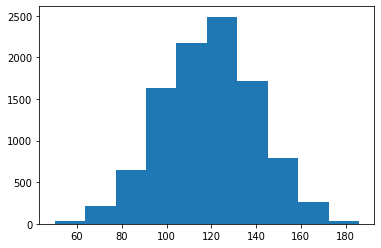

In [23]:
# node_dist = [len(g.number_of_nodes()) for g in train_loader.dataset]
node_dist = [g.nb_nodes for g in train_loader.dataset]
plt.hist(node_dist)
plt.show()
